After Under-sampling - Dataset: ../Data set/spamraw.csv
Number of spam samples: 598
Number of ham samples: 700

Run 1 - Dataset: ../Data set/spamraw.csv - Cross-Validation Scores: [0.93705036 0.93705036 0.93345324 0.91366906 0.94064748 0.93705036
 0.93345324 0.9442446  0.95683453 0.93693694]
Mean Accuracy: 0.9370
Standard Deviation: 0.0101
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.94      0.96       963
        spam       0.72      0.90      0.80       149

    accuracy                           0.94      1112
   macro avg       0.85      0.92      0.88      1112
weighted avg       0.95      0.94      0.94      1112


Run 1 - Dataset: ../Data set/spamraw.csv - Holdout Test Set Metrics:
Accuracy: 0.9388
Precision: 0.7166
Recall: 0.8993
F1 Score: 0.7976
---------------------------------------------------------------------

After Under-sampling - Dataset: ../Data set/TrainDataset.csv
Number of spam samples: 461
Number of h

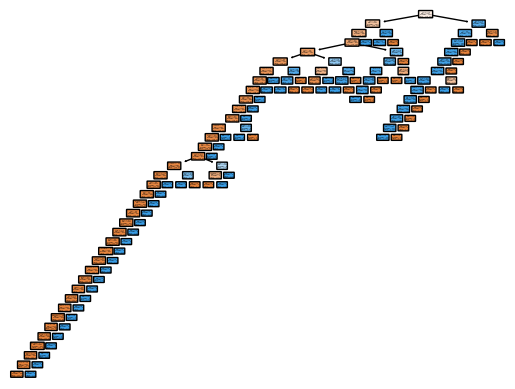

In [23]:
#decision tree

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# List of CSV file paths
data_files = ['../Data set/spamraw.csv', '../Data set/TrainDataset.csv', '../Data set/spam.csv']  # Add more file paths as needed

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)


for data_file in data_files:
    # Load the dataset
    data = pd.read_csv(data_file, encoding='latin1')

    # Check if 'text' column is present
    if 'text' not in data.columns:
        print(f"Skipping {data_file} - 'text' column not found.")
        continue

    # Preprocess the text data
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['text'])

    
        # Define the under-sampling strategy (specify the number of samples for 'ham')
    sampling_strategy = { 'ham': 700}

        # Create a pipeline with under-sampling
    pipeline = Pipeline([
            ('under', RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)),
            ('model', model)
    ])

        # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, data['type'], test_size=0.2, random_state=42)

        # Perform under-sampling and display class distribution
    X_resampled, y_resampled = pipeline.named_steps['under'].fit_resample(X_train, y_train)
    print(f'After Under-sampling - Dataset: {data_file}')
    print(f'Number of spam samples: {sum(y_resampled == "spam")}')
    print(f'Number of ham samples: {sum(y_resampled == "ham")}')

        # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, data['type'], cv=10, scoring='accuracy')

        # Display cross-validation results
    print(f'\nRun {i + 1} - Dataset: {data_file} - Cross-Validation Scores: {cv_scores}')
    print(f'Mean Accuracy: {cv_scores.mean():.4f}')
    print(f'Standard Deviation: {cv_scores.std():.4f}')

        # Visualize the Decision Tree (optional)
    pipeline.fit(X_resampled, y_resampled)
    plot_tree(pipeline.named_steps['model'], feature_names=vectorizer.get_feature_names_out(),
                  class_names=pipeline.named_steps['model'].classes_, filled=True, rounded=True)

        # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

        # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

        # Display the results for the holdout test set
    print(f'\nRun {i + 1} - Dataset: {data_file} - Holdout Test Set Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision_score(y_test, y_pred, pos_label="spam"):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred, pos_label="spam"):.4f}')
    print(f'F1 Score: {f1_score(y_test, y_pred, pos_label="spam"):.4f}')
    print("---------------------------------------------------------------------\n")

In [13]:
#KNN

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# List of CSV file paths
data_files = ['../Data set/spamraw.csv', '../Data set/TrainDataset.csv', '../Data set/spam.csv']  # Add more file paths as needed

# Create a KNN model
model = KNeighborsClassifier()

# Specify the number of CV runs
num_cv_runs = 1  # You can adjust this to the desired number

for data_file in data_files:
    # Load the dataset
    data = pd.read_csv(data_file, encoding='latin1')

    # Check if 'text' column is present
    if 'text' not in data.columns:
        print(f"Skipping {data_file} - 'text' column not found.")
        continue

    # Preprocess the text data
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['text'])

    for i in range(num_cv_runs):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, data['type'], test_size=0.2, random_state=i)

        # Perform cross-validation
        cv_scores = cross_val_score(model, X, data['type'], cv=10, scoring='accuracy')

        # Display cross-validation results
        print(f'\nRun {i + 1} - Dataset: {data_file} - Cross-Validation Scores: {cv_scores}')
        print(f'Mean Accuracy: {cv_scores.mean():.4f}')
        print(f'Standard Deviation: {cv_scores.std():.4f}')

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)

        # Display the results for the holdout test set
        print(f'\nRun {i + 1} - Dataset: {data_file} - Holdout Test Set Metrics:')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'Precision: {precision_score(y_test, y_pred, pos_label="spam"):.4f}')
        print(f'Recall: {recall_score(y_test, y_pred, pos_label="spam"):.4f}')
        print(f'F1 Score: {f1_score(y_test, y_pred, pos_label="spam"):.4f}')

        # Display classification report
        print(f'\nClassification Report:\n{classification_report(y_test, y_pred)}')


Run 1 - Dataset: ../Data set/spamraw.csv - Cross-Validation Scores: [0.92266187 0.92446043 0.91906475 0.93165468 0.92985612 0.92266187
 0.92625899 0.92805755 0.91007194 0.92432432]
Mean Accuracy: 0.9239
Standard Deviation: 0.0058

Run 1 - Dataset: ../Data set/spamraw.csv - Holdout Test Set Metrics:
Accuracy: 0.9281
Precision: 1.0000
Recall: 0.3985
F1 Score: 0.5699

Classification Report:
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       979
        spam       1.00      0.40      0.57       133

    accuracy                           0.93      1112
   macro avg       0.96      0.70      0.77      1112
weighted avg       0.93      0.93      0.91      1112


Run 1 - Dataset: ../Data set/TrainDataset.csv - Cross-Validation Scores: [0.92152466 0.91928251 0.91479821 0.91255605 0.92376682 0.9058296
 0.90807175 0.91910112 0.90561798 0.91011236]
Mean Accuracy: 0.9141
Standard Deviation: 0.0063

Run 1 - Dataset: ../Data set/TrainDataset.csv

In [21]:
# SVM


import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

class SVMClassifier:
    def __init__(self, file_path, text_column, label_column, test_size=0.2, random_state=42, k_folds=5):
        self.file_path = file_path
        self.text_column = text_column
        self.label_column = label_column
        self.test_size = test_size
        self.random_state = random_state
        self.k_folds = k_folds

    def load_data(self):
        return pd.read_csv(self.file_path)

    def split_data(self, data):
        X_train, X_test, y_train, y_test = train_test_split(
            data[self.text_column],
            data[self.label_column],
            test_size=self.test_size,
            random_state=self.random_state
        )
        return X_train, X_test, y_train, y_test

    def vectorize_text(self, X_train, X_test):
        vectorizer = TfidfVectorizer()
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)
        return X_train_tfidf, X_test_tfidf

    def train_svm_classifier(self, X_train_tfidf, y_train, kernel='linear', C=1.0):
        svm_classifier = SVC(kernel=kernel, C=C)
        svm_classifier.fit(X_train_tfidf, y_train)
        return svm_classifier

    def evaluate_classifier(self, svm_classifier, X_test_tfidf, y_test):
        y_pred = svm_classifier.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        return accuracy, conf_matrix, classification_rep

    def k_fold_cross_validation(self, data):
        skf = StratifiedKFold(n_splits=self.k_folds, shuffle=True, random_state=self.random_state)
        accuracies = []

        for train_index, test_index in skf.split(data[self.text_column], data[self.label_column]):
            X_train, X_test = data[self.text_column].iloc[train_index], data[self.text_column].iloc[test_index]
            y_train, y_test = data[self.label_column].iloc[train_index], data[self.label_column].iloc[test_index]

            X_train_tfidf, X_test_tfidf = self.vectorize_text(X_train, X_test)
            svm_classifier = self.train_svm_classifier(X_train_tfidf, y_train)
            accuracy, _, _ = self.evaluate_classifier(svm_classifier, X_test_tfidf, y_test)
            accuracies.append(accuracy)

        return accuracies

    def plot_svm_decision_boundary_plotly(self, svm_classifier, X, y):
        h = .02  # Step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        fig = px.scatter(x=X[:, 0], y=X[:, 1], color=y, labels={'color': 'label'})
        fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))

        fig.add_trace(
            go.Contour(x=np.arange(x_min, x_max, h), y=np.arange(y_min, y_max, h), z=Z, colorscale='Viridis',
                       showscale=False)
        )

        fig.show()
        
    def load_data(self, file_path, encoding='utf-8'):
        return pd.read_csv(file_path, encoding=encoding)

    def run_classification(self, file_path, is_imbalanced=False):
        sms_data = self.load_data(file_path, encoding='latin1')
                
        if is_imbalanced:
            # If data is imbalanced, you can handle it here
            
            X_train, X_test, y_train, y_test = self.split_data(sms_data)
            X_train_tfidf, X_test_tfidf = self.vectorize_text(X_train, X_test)
            svm_classifier = self.train_svm_classifier(X_train_tfidf, y_train)
            accuracy, conf_matrix, classification_rep = self.evaluate_classifier(svm_classifier, X_test_tfidf, y_test)

            print(f'Accuracy: {accuracy}')
            report_dict = classification_report(y_test, svm_classifier.predict(X_test_tfidf), output_dict=True)
            precision = report_dict['weighted avg']['precision']
            recall = report_dict['weighted avg']['recall']
            f1 = report_dict['weighted avg']['f1-score']

            print(f'Precision: {precision}')
            print(f'Recall: {recall}')
            print(f'F1 Score: {f1}')

            print(f'Confusion Matrix:\n{conf_matrix}')
            print(f'Classification Report:\n{classification_rep}')
            # Assuming you have 2 features for simplicity in the plot
            if X_train_tfidf.shape[1] == 2:
                self.plot_svm_decision_boundary_plotly(svm_classifier, X_train_tfidf.toarray(), y_train)
                plt.show()

        # K-fold cross-validation
        accuracies = self.k_fold_cross_validation(sms_data)
        avg_accuracy = sum(accuracies) / len(accuracies)
        print(f'Average Accuracy (K-fold Cross-Validation): {avg_accuracy}')

if __name__ == "__main__":
    svm_classifier_instance_1 = SVMClassifier(
        file_path='../Data set/spamraw.csv',
        text_column='text',
        label_column='type'
    )
    svm_classifier_instance_1.run_classification('../Data set/spamraw.csv', is_imbalanced=True)

    svm_classifier_instance_2 = SVMClassifier(
        file_path='../Data set/TrainDataset.csv',
        text_column='text',
        label_column='type'
    )
    svm_classifier_instance_2.run_classification('../Data set/TrainDataset.csv', is_imbalanced=True)
    
    svm_classifier_instance_2 = SVMClassifier(
        file_path='../Data set/spam.csv',
        text_column='text',
        label_column='type'
    )
    svm_classifier_instance_2.run_classification('../Data set/spam.csv', is_imbalanced=True)

Accuracy: 0.9829136690647482
Precision: 0.9828474370937194
Recall: 0.9829136690647482
F1 Score: 0.9825812583558733
Confusion Matrix:
[[960   3]
 [ 16 133]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       963
        spam       0.98      0.89      0.93       149

    accuracy                           0.98      1112
   macro avg       0.98      0.94      0.96      1112
weighted avg       0.98      0.98      0.98      1112

Average Accuracy (K-fold Cross-Validation): 0.9852488846006903
Accuracy: 0.992152466367713
Precision: 0.9922237150517934
Recall: 0.992152466367713
F1 Score: 0.992060053069232
Confusion Matrix:
[[764   0]
 [  7 121]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       764
        spam       1.00      0.95      0.97       128

    accuracy                           0.99       892
   macro avg       1.00      0.97    

In [24]:
#niva Bayes

import pandas as pd
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# List of CSV file paths
data_files = ['../Data set//spamraw.csv', '../Data set/TrainDataset.csv', '../Data set/spam.csv']  # Add more file paths as needed

# Create a Naive Bayes model
model = MultinomialNB()



for data_file in data_files:
    # Load the dataset
    data = pd.read_csv(data_file, encoding='latin1')

    # Check if 'text' column is present
    if 'text' not in data.columns:
        print(f"Skipping {data_file} - 'text' column not found.")
        continue

    # Preprocess the text data
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['text'])

    
        # Define the under-sampling strategy (specify the number of samples for 'ham')
    sampling_strategy = {'ham': 700}

        # Create a pipeline with under-sampling
    pipeline = Pipeline([
            ('under', RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)),
            ('model', model)
    ])

        # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, data['type'], test_size=0.2, random_state=i)

        # Perform under-sampling and display class distribution
    X_resampled, y_resampled = pipeline.named_steps['under'].fit_resample(X_train, y_train)
    print(f'After Under-sampling - Dataset: {data_file}')
    print(f'Number of spam samples: {sum(y_resampled == "spam")}')
    print(f'Number of ham samples: {sum(y_resampled == "ham")}')

        # Fit the Naive Bayes model
    pipeline.fit(X_resampled, y_resampled)

        # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, data['type'], cv=10, scoring='accuracy')

        # Display cross-validation results
    print(f'\nRun {i + 1} - Dataset: {data_file} - Cross-Validation Scores: {cv_scores}')
    print(f'Mean Accuracy: {cv_scores.mean():.4f}')
    print(f'Standard Deviation: {cv_scores.std():.4f}')

        # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

        # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

                # Display the results for the holdout test set
    print(f'\nRun {i + 1} - Dataset: {data_file} - Holdout Test Set Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print("\n")

        # Replace precision, recall, and f1_score with classification report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

        # Display the results for the holdout test set
    print(f'\nRun {i + 1} - Dataset: {data_file} - Holdout Test Set Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision_score(y_test, y_pred, pos_label="spam"):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred, pos_label="spam"):.4f}')
    print(f'F1 Score: {f1_score(y_test, y_pred, pos_label="spam"):.4f}')
    print("---------------------------------------------------------------------\n")

After Under-sampling - Dataset: ../Data set//spamraw.csv
Number of spam samples: 614
Number of ham samples: 700

Run 1 - Dataset: ../Data set//spamraw.csv - Cross-Validation Scores: [0.96942446 0.96402878 0.9676259  0.95503597 0.97661871 0.96942446
 0.97661871 0.97122302 0.96582734 0.96396396]
Mean Accuracy: 0.9680
Standard Deviation: 0.0061

Run 1 - Dataset: ../Data set//spamraw.csv - Holdout Test Set Metrics:
Accuracy: 0.9730


Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       979
        spam       0.84      0.96      0.90       133

    accuracy                           0.97      1112
   macro avg       0.92      0.97      0.94      1112
weighted avg       0.98      0.97      0.97      1112


Run 1 - Dataset: ../Data set//spamraw.csv - Holdout Test Set Metrics:
Accuracy: 0.9730
Precision: 0.8366
Recall: 0.9624
F1 Score: 0.8951
---------------------------------------------------------------------

After U

In [12]:
#Logistic regression

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# List of CSV file paths
data_files = ['../Data set//spamraw.csv', '../Data set//TrainDataset.csv', '../Data set//spam.csv']  # Add more file paths as needed

# Specify the number of CV runs
num_cv_runs = 1  # You can adjust this to the desired number

for data_file in data_files:
    # Load the dataset
    data = pd.read_csv(data_file, encoding='latin1')

    # Check if 'text' column is present
    if 'text' not in data.columns:
        print(f"Skipping {data_file} - 'text' column not found.")
        continue

    # Preprocess the text data
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['text'])

    # Create a Logistic Regression model inside the loop
    model = LogisticRegression(solver='liblinear')

    for i in range(num_cv_runs):
        # Define the under-sampling strategy (specify the number of samples for 'ham')
        sampling_strategy = {'ham': 700}

        # Create a pipeline with under-sampling
        pipeline = Pipeline([
            ('under', RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)),
            ('model', model)
        ])

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, data['type'], test_size=0.2, random_state=i)

        # Perform under-sampling and display class distribution
        X_resampled, y_resampled = pipeline.named_steps['under'].fit_resample(X_train, y_train)
        print(f'After Under-sampling - Dataset: {data_file}')
        print(f'Number of spam samples: {sum(y_resampled == "spam")}')
        print(f'Number of ham samples: {sum(y_resampled == "ham")}')

        # Fit the logistic regression model to the resampled training data
        pipeline.fit(X_resampled, y_resampled)

        # Perform cross-validation
        cv_scores = cross_val_score(pipeline, X, data['type'], cv=10, scoring='accuracy')

        # Display cross-validation results
        print(f'\nRun {i + 1} - Dataset: {data_file} - Cross-Validation Scores: {cv_scores}')
        print(f'Mean Accuracy: {cv_scores.mean():.4f}')
        print(f'Standard Deviation: {cv_scores.std():.4f}')

        # Make predictions on the test set
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)

        # Display the results for the holdout test set
        print(f'\nRun {i + 1} - Dataset: {data_file} - Holdout Test Set Metrics:')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'Precision: {precision_score(y_test, y_pred, pos_label="spam"):.4f}')
        print(f'Recall: {recall_score(y_test, y_pred, pos_label="spam"):.4f}')
        print(f'F1 Score: {f1_score(y_test, y_pred, pos_label="spam"):.4f}')

After Under-sampling - Dataset: ../Data set//spamraw.csv
Number of spam samples: 614
Number of ham samples: 700

Run 1 - Dataset: ../Data set//spamraw.csv - Cross-Validation Scores: [0.97482014 0.97661871 0.97661871 0.96402878 0.98021583 0.98021583
 0.9676259  0.97661871 0.97482014 0.96936937]
Mean Accuracy: 0.9741
Standard Deviation: 0.0051

Run 1 - Dataset: ../Data set//spamraw.csv - Holdout Test Set Metrics:
Accuracy: 0.9811
Precision: 0.8944
Recall: 0.9549
F1 Score: 0.9236
After Under-sampling - Dataset: ../Data set//TrainDataset.csv
Number of spam samples: 460
Number of ham samples: 700

Run 1 - Dataset: ../Data set//TrainDataset.csv - Cross-Validation Scores: [0.96860987 0.97533632 0.98878924 0.99103139 0.98206278 0.96860987
 0.97757848 0.97977528 0.97078652 0.95955056]
Mean Accuracy: 0.9762
Standard Deviation: 0.0092

Run 1 - Dataset: ../Data set//TrainDataset.csv - Holdout Test Set Metrics:
Accuracy: 0.9798
Precision: 0.9370
Recall: 0.9225
F1 Score: 0.9297
After Under-sampling 